In [3]:
# The explaining document contains the assumptions and processes. 
# This code is initializing the model creation. 
# I've checked some exapmles 
# [https://matheusfacure.github.io/python-causality-handbook/11-Propensity-Score.html]
# [https://www.kaggle.com/code/canorhanakpinar/propensity-score-matching-in-python/edit]
# and sometimes using ChatGPT code which message log is (or will be) in the appendix. 


## Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.linear_model import LogisticRegression
import statsmodels.formula.api as smf
from causalinference import CausalModel





# # Intro

# ## Import Data & Check Missing Values

# ... psm_dataset = pd.read_csv(....)
# psm_dataset.info()
# psm_dataset.describe()

# ### Attain variables
# note that, population size accounts to a threshold that can directly alter the treatment status.

# X_full = data["x1", "x2", ... "xn"]


# So for the training purposes, I import the Heart Data which I used in a bootcamp project.

psm_dataset = pd.read_csv("heart_disease_health_indicators_BRFSS2015.csv")
print(psm_dataset.info())
print(psm_dataset.describe())

X_full = psm_dataset.drop(columns="HeartDiseaseorAttack")
feature_list = X_full.columns.values.tolist()
Y = psm_dataset.drop(columns = feature_list)

print(X_full,Y)

print(feature_list)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [4]:
# Fit Logit

print(smf.logit("HeartDiseaseorAttack  ~ C(HighBP) + C(HighChol) + C(CholCheck) + np.log(BMI) + C(Smoker) + C(Stroke) + C(Diabetes) + C(PhysActivity) + C(Fruits) + C(Veggies) + C(HvyAlcoholConsump)  + C(AnyHealthcare) + C(NoDocbcCost) + C(GenHlth)  + MentHlth + PhysHlth + C(DiffWalk) + C(Sex) + C(Age) + C(Education) + C(Income)", data=psm_dataset).fit().summary().tables[1])


print(smf.logit("HeartDiseaseorAttack  ~ C(HighBP) + C(HighChol) + C(CholCheck) + BMI + C(Smoker) + C(Stroke) + C(Diabetes) + C(PhysActivity) + C(Fruits) + C(Veggies) + C(HvyAlcoholConsump)  + C(AnyHealthcare) + C(NoDocbcCost) + C(GenHlth)  + MentHlth + PhysHlth + C(DiffWalk) + C(Sex) + C(Age) + C(Education) + C(Income)", data=psm_dataset).fit().summary().tables[1])


Optimization terminated successfully.
         Current function value: 0.238193
         Iterations 9
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -7.2148      0.333    -21.647      0.000      -7.868      -6.562
C(HighBP)[T.1.0]                0.5184      0.018     29.083      0.000       0.484       0.553
C(HighChol)[T.1.0]              0.6089      0.017     36.855      0.000       0.577       0.641
C(CholCheck)[T.1.0]             0.5275      0.066      7.961      0.000       0.398       0.657
C(Smoker)[T.1.0]                0.3529      0.016     22.266      0.000       0.322       0.384
C(Stroke)[T.1.0]                0.9781      0.024     40.055      0.000       0.930       1.026
C(Diabetes)[T.1.0]              0.0400      0.047      0.855      0.393      -0.052       0.132
C(Diabetes)[T.2.0]              0.

In [5]:
# smf.fit hereby provides insight on coefficients of categorical variables.

C:\Users\omen\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


               column     coeff
0              HighBP  0.524856
1            HighChol  0.611410
2           CholCheck  0.519930
3                 BMI  0.000931
4              Smoker  0.362135
5              Stroke  0.977883
6            Diabetes  0.146554
7        PhysActivity  0.040214
8              Fruits  0.006640
9             Veggies  0.042833
10  HvyAlcoholConsump -0.287578
11      AnyHealthcare -0.008218
12        NoDocbcCost  0.251848
13            GenHlth  0.490617
14           MentHlth  0.002455
15           PhysHlth  0.001063
16           DiffWalk  0.295380
17                Sex  0.760448
18                Age  0.255453
19          Education  0.010669
20             Income -0.043003
the binary prediction is: 0.0
the corresponding probabilities are: [0.68805483 0.31194517]
    HeartDiseaseorAttack  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                    0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1                    0.0     0.0       0.0     

<Axes: xlabel='ps', ylabel='Count'>

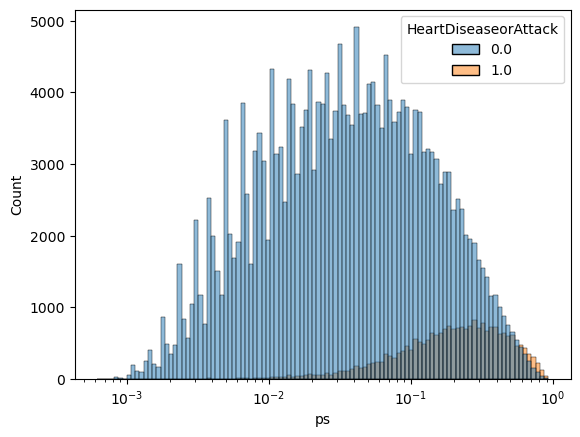

In [6]:
lr = LogisticRegression(max_iter=7000)
lr.fit(X_full, Y)

coeffs = pd.DataFrame({
    'column':X_full.columns.to_numpy(),
    'coeff':lr.coef_.ravel(),
})
print(coeffs)

pred_binary = lr.predict(X_full)  # binary 0 control, 1, treatment
pred_prob = lr.predict_proba(X_full)  # probabilities for classes

print('the binary prediction is:', pred_binary[0])
print('the corresponding probabilities are:', pred_prob[0])

psm_dataset['ps'] = pred_prob[:, 1]

def logit(p):
    logit_value = math.log(p / (1-p))
    return logit_value

psm_dataset['ps_logit'] = psm_dataset.ps.apply(lambda x: logit(x))

print(psm_dataset[:20])


# check the overlap of ps for control and treatment using histogram
# if not much overlap, the matching won't work
sns.histplot(data=psm_dataset, x='ps', hue="HeartDiseaseorAttack", log_scale = True)  